Details on data can be found here in HADS_doc.pdf found in project page.

This analysis will focus on data from 1985, imported in next cell.

Some acronyms to keep in mind:

HH = household
AMI = area median income
FMR = fair market rent

In the analysis that follows, each variable of interest (listed a few cells below) will be analyzed for negative or undefined values. To visualize the distribution of values, histograms and value counts will be used for continous and categorial data, respectively.

For categorical data, the approach is to look for string literals set to a negative number. These were set to not_defined. If the majority of observations are not defined or the values themselves cannot be interpreted, then the entire variable is to be dropped.

For continous data, if there is a large spike of observations at a single negative value, then these observations are to be set to NaN. Some continous variables had a continous distribution of negative values. These observations are to be interpreted as households in financial distress. Their negative values were fixed to a non-negative value, depending on the variable definition. Also for some continous variables, outliers were set to a fixed cutoff.

A slightly different approach was used for the variable NUNITS (number of units). In this case, this variable was converted to a categorial variable with 5 levels.

It was observed that 5 continous variables had exactly 2810 NaN observations. Further analysis show that these variables coincided in their NaN observations. Two catogorical variables also had 2810 observations set at a specific value. The values of these categorical variables also correlated with the NaN observations from the 5 continous variables.

These 2810 rows were dropped from the data frame. These removed rows represents about 6 percent of the total number of observations. The final data frame was stored as a separate csv file called 1985_clean.csv

In [188]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
df = pd.read_csv("hads85.txt")


In [189]:
df.head()

,CONTROL,REGION,METRO,WEIGHT,ISTATUS,NUNITS,BEDRMS,VACANCY,BUILT,VALUE,...,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTIncRelAMICat,FMTMetro,FMTOwnRent,FMTRegion,FMTStatus,FMTStructureType,FMTZAdeq
0,'100006110249',3,7,2883.27,1,1,3,-9,81,-9,...,'4 60 - 80% AMI','4 60 - 80% AMI','4 60 - 80% AMI','4 60 - 80% AMI','-5','2 Renter','-5','1 Occupied','1 Single Family','1 Adequate'
1,'100007130148',3,1,2785.89,1,16,2,-9,81,-9,...,'4 60 - 80% AMI','4 60 - 80% AMI','4 60 - 80% AMI','3 50 - 60% AMI','Central City','2 Renter','-5','1 Occupied','3 5-19 units','1 Adequate'
2,'100008700141',4,6,2450.53,3,8,2,1,84,-9,...,'5 80 - 100% AMI','5 80 - 100% AMI','5 80 - 100% AMI','.','-5','2 Renter','West','3 Vacant','3 5-19 units','1 Adequate'
3,'100014110140',3,7,2306.52,1,2,2,-9,85,-9,...,'4 60 - 80% AMI','4 60 - 80% AMI','4 60 - 80% AMI','4 60 - 80% AMI','-5','2 Renter','-5','1 Occupied','2 2-4 units','1 Adequate'
4,'100014350142',1,3,2504.35,1,1,3,-9,84,160000,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','-5','1 Owner','-5','1 Occupied','1 Single Family','1 Adequate'


There are 96 variables in a given file.

The following variables will be analyzed. If necessary, more variables can be considered later in the analysis.

AGE or age1                   = Age of head of household

ASSISTED                      = Assisted Housing

BEDRMS                        = # of bedrooms in unit

BUILT                         = Year unit was built

BURDEN                        = Housing cost as a fraction of income

COSTMED                       = Housing cost at Median interest

COSTMedRELAMICAT              = CostMed Relative to Median Income (Category)

COSTMedRELAMIPCT              = CostMed Relative to Median Income (Percent)

FMR                           = Fair market rent (average)

FMTASSISTED                   = Assisted Housing

FMTMETRO or FMTMETRO3         = CENTRAL CITY/SUBURBAN STATUS

FMTOWNRENT                    = Owner/Renter Status (adjusted)

FMTREGION                     = Census Region

FMTSTATUS                     = Occupancy Status

FMTSTRUCTURETYPE              = Structure Type

INCRELAMICAT                  = HH Income relative to AMI (category)

INCRELAMIPCT                  = HH Income relative to AMI (percent)

IPOV                          = Poverty Income

LMED                          = Area median income (average)

NUNITS                        = # of units in building

OTHERCOST                     = Insurance, condo, land rent, other mobile home fees

OWNRENT                       = Tenure (adjusted)

PER                           = # of persons in household

ROOMS                         = # of rooms in unit

TENURE                        = Owner/renter status of unit

TOTSAL                        = Total Wage Income

UTILITY                       = Monthly utility cost

VACANCY                       = Vacancy status

VALUE                         = Current market value of unit

ZINC2                         = Household income

ZSMHC                         = Monthly housing costs


Looking at AGE which is age of head of household

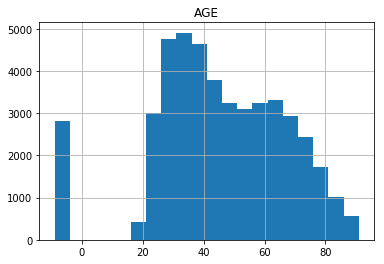

In [190]:
col_list = ['AGE']
hist = df.hist(column=col_list, bins=20)

AGE1 has several negative values. Viewing the distribution below of the negative values

In [191]:
df.loc[df['AGE'] < 0, 'AGE'].value_counts()

-9    2810
Name: AGE, dtype: int64

There are 2810 rows with age set to -9. Likely the age was not availabe for these records. Therefore setting them to NaN below.

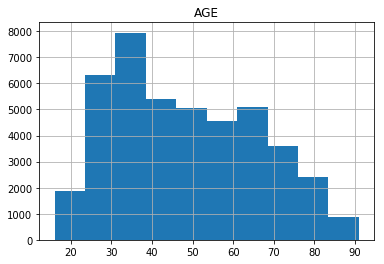

In [192]:
df.loc[df['AGE'] == -9, 'AGE'] = np.NaN
col_list = ['AGE']
hist = df.hist(column=col_list, bins=10)

Defining cols_to_keep which is a list of column names to be kept in the final data file

In [193]:
cols_to_keep = []
cols_to_keep.append('AGE')

Looking at Assisted and FMTAssisted variables represnting assisted housing

In [194]:
print(df['Assisted'].value_counts())
print(df['FMTAssisted'].value_counts())

0    43637
1     2277
Name: Assisted, dtype: int64
'0 Not Assisted'    43637
'1 Assisted'         2277
Name: FMTAssisted, dtype: int64


Assisted and FMTAssisted are binary variables.

Assisted and FMTAssisted (FMT stands for formatted) show same information. Keeping FMTAssisted variable only as it is more descriptive

In [195]:
cols_to_keep.append('FMTAssisted')

Next up is BEDRMS which is number of bedrooms in household

In [196]:
df['BEDRMS'].value_counts()

3     17643
2     14684
1      6301
4      5313
5       940
0       795
6       178
7        32
10       20
8         7
9         1
Name: BEDRMS, dtype: int64

If the household has 7 or more bedrooms, the number of bedrooms will be set to 7

In [197]:
df.loc[df['BEDRMS'] > 6, 'BEDRMS'] = 7
df['BEDRMS'].value_counts()

3    17643
2    14684
1     6301
4     5313
5      940
0      795
6      178
7       60
Name: BEDRMS, dtype: int64

In [198]:
cols_to_keep.append('BEDRMS')

Looking next at BUILT and FMT Built variables which denotes year house was built.

In [199]:
df['BUILT'].value_counts()

4     7896
5     6893
3     5445
9     5254
6     4123
2     3958
7     3198
8     2885
1     2504
84     804
83     685
80     630
81     619
85     565
82     455
Name: BUILT, dtype: int64

In [200]:
df['FMTBuilt'].value_counts()

'1960-1979'    19803
'-5'           11337
'1940-1959'    11016
'1980-1989'     3758
Name: FMTBuilt, dtype: int64

The values for built are not defined in documentation. Built variable to be dropped.

FMTBuilt has a clear interpretation of the values. If FMTBuilt is -5, value to be set to not_defined.

In [201]:
df.loc[df['FMTBuilt'].str.contains('-5'), 'FMTBuilt'] = '\'not_defined\''
df['FMTBuilt'].value_counts()

'1960-1979'      19803
'not_defined'    11337
'1940-1959'      11016
'1980-1989'       3758
Name: FMTBuilt, dtype: int64

In [202]:
cols_to_keep.append('FMTBuilt')

Next variable is Burden defined as Housing cost as a fraction of income

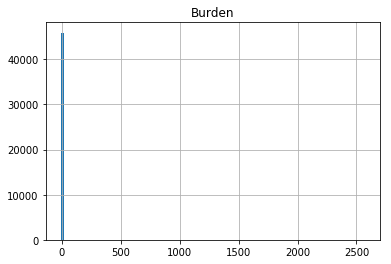

In [203]:
hist = df.hist(column='Burden', bins=100)

The burden values are concerntrated near 0; however there are outliers far to the right of 0. Looking at the distribution for values less than 10 and value counts for values less than 0 in the next cell

-9.0    4998
-1.0     434
Name: Burden, dtype: int64

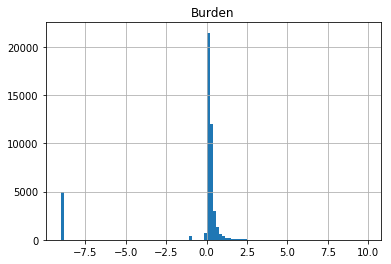

In [204]:
hist = df.loc[df['Burden'] < 10].hist(column='Burden',bins=100)
df.loc[df['Burden'] < 0, 'Burden' ].value_counts()


BURDEN is a continuous variable. Setting the 4998 values of -9 to NaN as these seem to be unavailable. Will assume that BURDEN set to -1 are households with no income (the ratio of cost to income would be infinite). There are also households with BURDEN higher than 1. Therefore if BURDEN is -1 or is 10 or more, the BURDEN is to be set at 10.

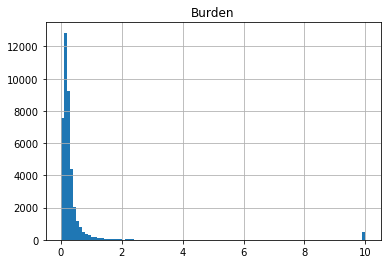

In [205]:
df.loc[df['Burden'] == -9, 'Burden'] = np.NaN
df.loc[df['Burden'] == -1, 'Burden'] = 10
df.loc[df['Burden']  > 10, 'Burden'] = 10
hist = df.hist(column = 'Burden', bins = 100)

In [206]:
cols_to_keep.append('Burden')

Next up is COSTMED defined as housing cost assuming mortgage payments at median interest and CostMedRelAMIPct defined as COSTMED relative to Area Median Income (percent)

0
0


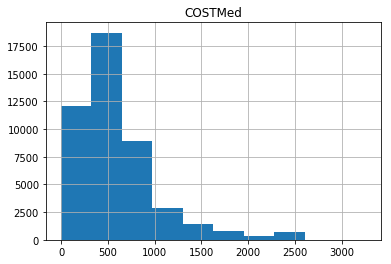

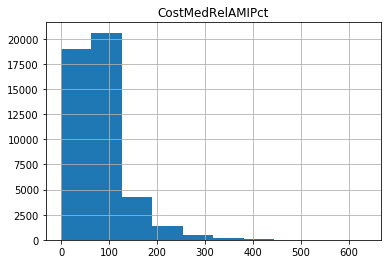

In [207]:
hist = df.hist(column='COSTMed',bins=10)
print(df.loc[df['COSTMed'] < 0,'COSTMed'].count())

hist = df.hist(column='CostMedRelAMIPct',bins=10)
print(df.loc[df['CostMedRelAMIPct'] < 0,'CostMedRelAMIPct'].count())


COSTMED and CostMedRelAMIPct show no negative values. Also the distributions have no outliers

Next up is CostMedRelAMICat which is the categorical variable to CostMedRelAMIPct and FMTCOSTMEDRELAMICAT is the formatted version of CostMedRelAMICat

In [208]:
cols_to_keep.append('COSTMed')
cols_to_keep.append('CostMedRelAMIPct')

In [209]:
print(df['CostMedRelAMICat'].value_counts())
print(df['FMTCOSTMEDRELAMICAT'].value_counts())

4    9138
2    7648
7    7314
5    7291
3    5344
1    4761
6    4418
Name: CostMedRelAMICat, dtype: int64
'4 60 - 80% AMI'      9138
'2 30 - 50% AMI'      7648
'7 120% AMI +'        7314
'5 80 - 100% AMI'     7291
'3 50 - 60% AMI'      5344
'1 LTE 30% AMI'       4761
'6 100 - 120% AMI'    4418
Name: FMTCOSTMEDRELAMICAT, dtype: int64


Both CostMedRelAMICat and FMTCOSTMEDRELAMICAT show the same value counts. However FMTCOSTMEDRELAMICAT better describes the category variables which are percentages of CostMed (cost assuming mortgage payments at median interest) relative to area median income. Therefore will keep FMTCOSTMEDRELAMICAT

Next variable to analyze is FMR defined as Fair Market Rent

In [210]:
cols_to_keep.append('FMTCOSTMEDRELAMICAT')

0


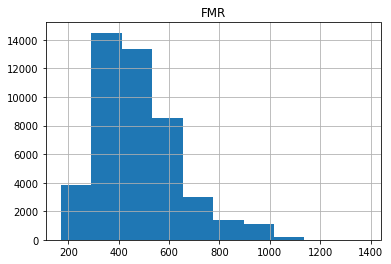

In [211]:
hist = df.hist(column='FMR', bins=10)
print(df.loc[df['FMR'] < 0,'FMR'].count())

FMR shows no negative values and no outliers. No further clean up needed.

Next up is FMTAssisted which indicates if household is assisted or not.

In [212]:
cols_to_keep.append('FMR')

In [213]:
df['FMTAssisted'].value_counts()

'0 Not Assisted'    43637
'1 Assisted'         2277
Name: FMTAssisted, dtype: int64

FMTAssisted shows no undefined values. No further clean up needed.

Next variable is FMTMetro defined as the central city or suburban status

In [214]:
cols_to_keep.append('FMTAssisted')

In [215]:
df['FMTMetro'].value_counts()

'-5'              29694
'Central City'    16220
Name: FMTMetro, dtype: int64

Most values have -5 value which is not defined in documentation. Dropping this column.

The next variable FMTOwnRest and OwnRent representing own/rent status of households

In [216]:
print(df['FMTOwnRent'].value_counts())
print(df['OwnRent'].value_counts())

'1 Owner'     28536
'2 Renter'    17378
Name: FMTOwnRent, dtype: int64
1    28536
2    17378
Name: OwnRent, dtype: int64


These variables have 2 values. Keeping FMTOwnRent as it is easy to interpret: owner or renter defined for each entry. No clean up needed.

Dropping variable OwnRent

Next variable is FMTREGION defined as Census Region

In [217]:
cols_to_keep.append('FMTOwnRent')

In [218]:
df['FMTRegion'].value_counts()

'-5'      36663
'West'     9251
Name: FMTRegion, dtype: int64

Most values have -5 value which is not defined in documentation. Dropping this column.

Next variable is FMTStatus defined as the household occupancy status

In [219]:
df['FMTStatus'].value_counts()

'1 Occupied'    43104
'3 Vacant'       2810
Name: FMTStatus, dtype: int64

This variable has 2 values, either occupied or vacant. No clean up needed.

Next variable is FMTStructureType which is the household structure type

In [220]:
cols_to_keep.append('FMTStatus')

In [221]:
df['FMTStructureType'].value_counts()

'1 Single Family'    30213
'2 2-4 units'         5613
'3 5-19 units'        4702
'6 Mobile Home'       2140
'5 50+ units'         1706
'4 20-49 units'       1540
Name: FMTStructureType, dtype: int64

No missing values found. No clean required for this variable.

Next variables to analyze are IncRelAMICat defined as income relative to area median income (categorical) and FMTIncRelAMICAT defined as formatted version of IncRelAMICat.

In [222]:
cols_to_keep.append('FMTStructureType')

In [223]:
print(df['IncRelAMICat'].value_counts())
print(df['FMTIncRelAMICat'].value_counts())

 7    14961
 1     6105
 2     5273
 5     5103
 4     4644
 6     4385
-9     2810
 3     2633
Name: IncRelAMICat, dtype: int64
'7 120% AMI +'        14961
'1 LTE 30% AMI'        6105
'2 30 - 50% AMI'       5273
'5 80 - 100% AMI'      5103
'4 60 - 80% AMI'       4644
'6 100 - 120% AMI'     4385
'.'                    2810
'3 50 - 60% AMI'       2633
Name: FMTIncRelAMICat, dtype: int64


Will use FMTIncRelAMICat as the category values are easy to interpret; dropping IncRelAMICat. There are 2810 rows with missing values. These are to be set to 'not_defined'

In [224]:
df.loc[df['FMTIncRelAMICat'].str.contains('.', regex=False), 'FMTIncRelAMICat'] = '\'not_defined\''
print(df['FMTIncRelAMICat'].value_counts())

'7 120% AMI +'        14961
'1 LTE 30% AMI'        6105
'2 30 - 50% AMI'       5273
'5 80 - 100% AMI'      5103
'4 60 - 80% AMI'       4644
'6 100 - 120% AMI'     4385
'not_defined'          2810
'3 50 - 60% AMI'       2633
Name: FMTIncRelAMICat, dtype: int64


Next variable to consider is IncRelAMIPct or income relative to area median income (percent)

In [225]:
cols_to_keep.append('FMTIncRelAMICat')

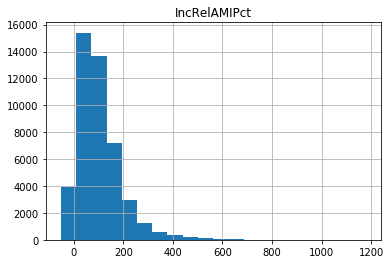

In [226]:
hist = df.hist(column='IncRelAMIPct', bins=20)

In [227]:
df.loc[df['IncRelAMIPct'] < 0, 'IncRelAMIPct'].value_counts()

-9.000000     2810
-35.118505       1
-50.600245       1
-46.579117       1
-10.119037       1
-10.544608       1
-34.897978       1
-23.702621       1
-31.851195       1
-23.593381       1
-41.829850       1
-11.312831       1
-30.357111       1
-30.339355       1
-31.223620       1
-27.527829       1
-22.593925       1
-1.520707        1
-15.499424       1
-34.408774       1
-32.460979       1
-46.819267       1
-4.055218        1
-12.014301       1
-38.617396       1
-52.035899       1
-1.531370        1
-44.992101       1
-40.966859       1
-4.375745        1
-10.162372       1
-26.336245       1
-2.248675        1
-22.031693       1
Name: IncRelAMIPct, dtype: int64

INCRELAMIPCT has 2810 values at -9. These likely represent not defined values. Setting them to NaN. There are is also a distribtion of negative values. Likely these represent incomes for households in financial distress. To be set to 0.

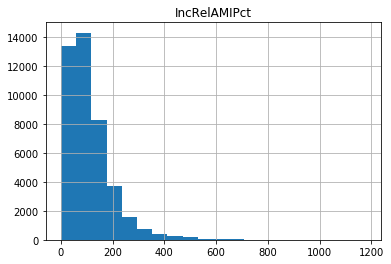

In [228]:
df.loc[df['IncRelAMIPct'] == -9, 'IncRelAMIPct'] = np.NaN
df.loc[df['IncRelAMIPct'] < 0  , 'IncRelAMIPct'] = 0
hist = df.hist(column='IncRelAMIPct', bins=20)

Next up is IPov defined as poverty level income

In [229]:
cols_to_keep.append('IncRelAMIPct')

0

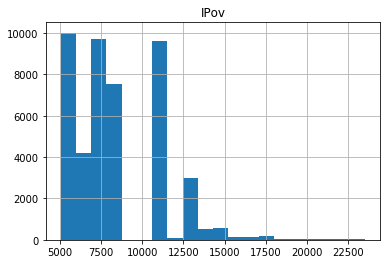

In [230]:
col_list = ['IPov']
hist = df.hist(column=col_list, bins=20)
df.loc[df['IPov'] < 0, 'IPov'].count()

IPov contains no negative values and no outliers. No clean up needed.

Next variable to analyze is LMed defined as area median income

In [231]:
cols_to_keep.append('IPov')

0

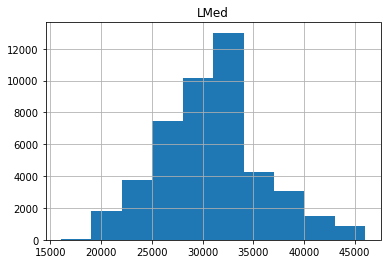

In [232]:
hist = df.hist(column = 'LMed', bins = 10)
df.loc[df['LMed'] < 0, 'LMed'].count()

LMed has no negative values and no outliers. No clean up needed.

Next variable is NUNITS which is the number of units (for example, number of units in an apartment building).

In [233]:
cols_to_keep.append('LMed')

In [234]:
columns = ['NUNITS']
for column in columns:
    print(df[column].value_counts())

1      32344
2       3080
4       1586
8       1074
3        956
101      909
6        709
12       658
16       521
10       373
5        324
24       212
20       196
7        187
9        172
11       158
18       156
14       152
36       108
30        98
48        79
15        79
40        74
60        69
17        66
21        54
42        54
32        54
28        52
25        47
13        42
100       40
54        39
23        39
22        38
26        38
35        37
38        37
96        35
39        34
34        34
50        32
72        31
33        31
19        31
44        31
90        30
27        29
70        26
41        25
80        24
62        24
31        23
97        22
29        22
65        20
45        20
56        19
46        19
53        18
55        17
69        17
37        17
57        16
64        16
67        16
47        16
79        15
84        15
51        15
94        13
92        13
98        12
63        12
49        12
73        11
66        11

NUNITS has no undefined values or negative values. The vast majority of households are single family homes. Will set this variable to a categorical variable, broken down as single unit, 2-9 units, 10-49 units, 50-99 units, 100 or more units.

In [235]:
# setting new categories for NUNITS
for index, row in df.iterrows():
    if   row['NUNITS'] >= 100:
        df.loc[index, 'NUNITS'] = '100 or more units'
    elif row['NUNITS'] >= 50:
        df.loc[index, 'NUNITS'] = '50-99 units'
    elif row['NUNITS'] >= 10:
        df.loc[index, 'NUNITS'] = '10-49 units'
    elif row['NUNITS'] > 1:
        df.loc[index, 'NUNITS'] = '2-9 units'
    elif row['NUNITS'] == 1:
        df.loc[index, 'NUNITS'] = 'single unit'

In [236]:
df['NUNITS'].value_counts()

single unit          32344
2-9 units             8088
10-49 units           3776
100 or more units      949
50-99 units            757
Name: NUNITS, dtype: int64

Next variable to analyze is OtherCost defined as Insurance, condo, land rent, other mobile home fees

In [237]:
cols_to_keep.append('NUNITS')

0

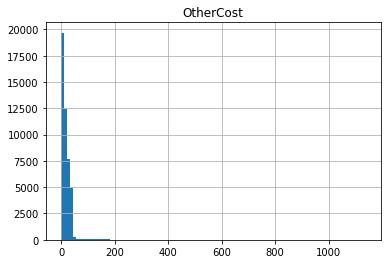

In [238]:
hist = df.hist(column='OtherCost',bins=100)
df.loc[df['OtherCost'] < 0, 'OtherCost'].count()

OtherCost has no negative values; however there are outliers beyond a cost of 200 USD. If the OtherCost of 200 USD or more, setting it to 500

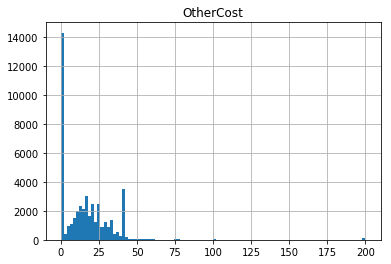

In [239]:
df.loc[df['OtherCost'] > 200, 'OtherCost'] = 200
hist = df.hist(column='OtherCost', bins=100)

Next variable to consider is PER denoting number of persons per household

In [240]:
cols_to_keep.append('OtherCost')

In [241]:
df['PER'].value_counts()

 2     13906
 1     10017
 3      7535
 4      6808
 5      3092
-9      2810
 6      1074
 7       374
 8       172
 9        63
 10       33
 11       16
 12        6
 14        4
 15        2
 13        2
Name: PER, dtype: int64

If number of persons per unit is 9 or more, setting value to 9. If PER is negative, setting to NaN

In [242]:
df.loc[df['PER'] > 8, 'PER'] = 9
df.loc[df['PER'] == -9, 'PER'] = np.NaN
df['PER'].value_counts()

2.0    13906
1.0    10017
3.0     7535
4.0     6808
5.0     3092
6.0     1074
7.0      374
8.0      172
9.0      126
Name: PER, dtype: int64

Next variable is the number of rooms per household

In [243]:
cols_to_keep.append('PER')

0

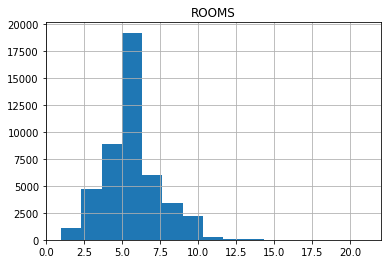

In [244]:
df['ROOMS'].value_counts()
hist = df.hist(column='ROOMS', bins=15)
df.loc[df['ROOMS'] < 0, 'ROOMS'].count()

ROOMS has no negative values. No clean up needed.

In [245]:
cols_to_keep.append('ROOMS')

In [246]:
df['TENURE'].value_counts()

 1    27664
 2    14490
-9     2810
 3      950
Name: TENURE, dtype: int64

TENURE has 4 possible values, one being -9. Since there is no explanation of this variable, it will be dropped.

Next variable to analyze is TotSal defined as total wage income.

-9    2810
Name: TotSal, dtype: int64

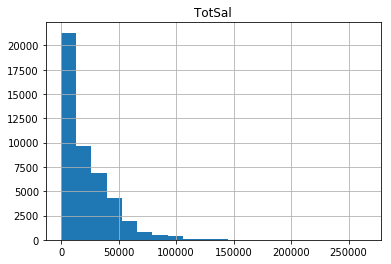

In [247]:
hist = df.hist(column='TotSal', bins=20)
df.loc[df['TotSal'] < 0, 'TotSal'].value_counts()

TotSal has 2810 values set at -9. Setting these to NaN.

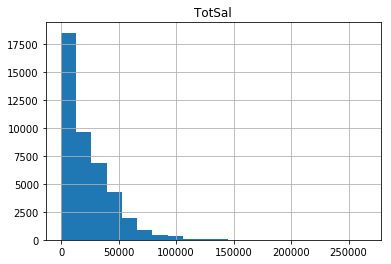

In [248]:
df.loc[df['TotSal'] == -9, 'TotSal'] = np.NaN
hist = df.hist(column='TotSal', bins=20)

Next variable is Unility defined as montly utility costs

In [249]:
cols_to_keep.append('TotSal')

0

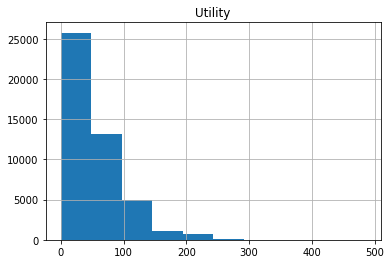

In [250]:
hist = df.hist(column='Utility', bins=10)
(df['Utility'] < 0).sum()

Utility has no negative values. No clean up needed.

Next up is VACANCY defined as vacancy status

In [251]:
cols_to_keep.append('Utility')

In [252]:
df['VACANCY'].value_counts()

-9    43104
 1     1590
 3      604
 5      268
 2      183
 4      165
Name: VACANCY, dtype: int64

VACANCY has most values set at -9. Not sure what the other values mean. There is no explanation in documentation. Dropping this variable.

Next variable is VALUE defined as current market value of unit.

-9    17378
Name: VALUE, dtype: int64

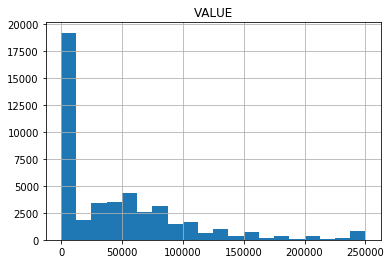

In [253]:
hist = df.hist(column='VALUE', bins=20)
df.loc[df['VALUE'] < 0, 'VALUE'].value_counts()

Setting value of -9 to NaN of variable VALUE

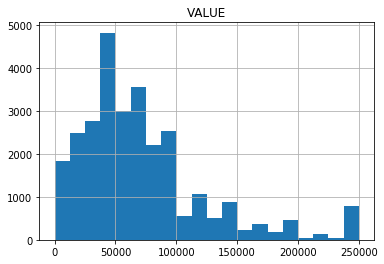

In [254]:
df.loc[df['VALUE'] == -9, 'VALUE'] = np.NaN
hist = df.hist(column='VALUE', bins=20)

Next variable is ZINC2 which is household income.

In [255]:
cols_to_keep.append('VALUE')

-9        2810
-10001      12
-3000        4
-6000        3
-4000        2
-400         2
-5000        2
-7000        2
-6801        1
-1000        1
-9000        1
-8800        1
-1104        1
-4700        1
-500         1
-384         1
-330         1
-1100        1
-6101        1
-3201        1
-1900        1
-2000        1
-6250        1
-8501        1
-9001        1
-5001        1
-9601        1
-3600        1
-1601        1
-8000        1
-6001        1
-8400        1
Name: ZINC2, dtype: int64

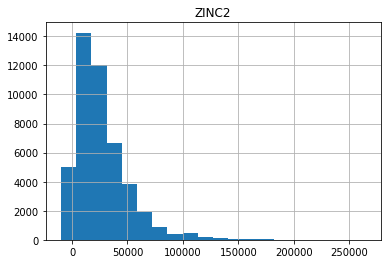

In [256]:
hist = df.hist(column='ZINC2', bins=20)
df.loc[df['ZINC2'] < 0, 'ZINC2'].value_counts()

There are 2810 observations of ZINC2 equal -9; to be set to NaN. Other negative values setting to 0 as these likely represent households in financial distress

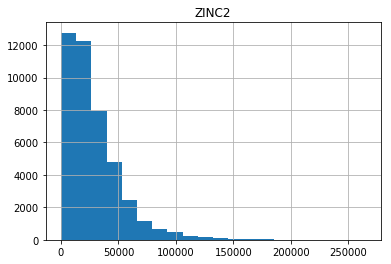

In [257]:
df.loc[df['ZINC2'] == -9, 'ZINC2' ] = np.NaN
df.loc[df['ZINC2'] < 0, 'ZINC2' ] = 0
hist = df.hist(column='ZINC2', bins=20)

Next variable is ZSMHC which is monthly housing cost

In [258]:
cols_to_keep.append('ZINC2')

-9    3261
Name: ZSMHC, dtype: int64

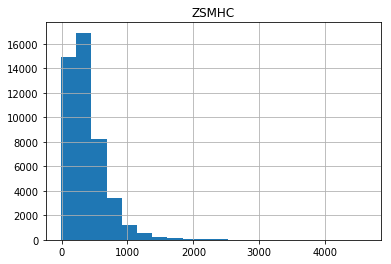

In [259]:
hist = df.hist(column='ZSMHC', bins=20)
df.loc[df['ZSMHC'] < 0, 'ZSMHC'].value_counts()

Observations equal to -9 to be set to NaN.

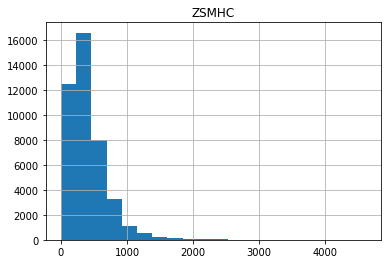

In [260]:
df.loc[df['ZSMHC'] == -9, 'ZSMHC' ] = np.NaN
hist = df.hist(column='ZSMHC', bins=20)

In [261]:
cols_to_keep.append('ZSMHC')

In [262]:
cols_to_keep

['AGE',
 'FMTAssisted',
 'BEDRMS',
 'FMTBuilt',
 'Burden',
 'COSTMed',
 'CostMedRelAMIPct',
 'FMTCOSTMEDRELAMICAT',
 'FMR',
 'FMTAssisted',
 'FMTOwnRent',
 'FMTStatus',
 'FMTStructureType',
 'FMTIncRelAMICat',
 'IncRelAMIPct',
 'IPov',
 'LMed',
 'NUNITS',
 'OtherCost',
 'PER',
 'ROOMS',
 'TotSal',
 'Utility',
 'VALUE',
 'ZINC2',
 'ZSMHC']

In [263]:
df2 = df.loc[:,cols_to_keep]
df2.head()

,AGE,FMTAssisted,BEDRMS,FMTBuilt,Burden,COSTMed,CostMedRelAMIPct,FMTCOSTMEDRELAMICAT,FMR,FMTAssisted,...,LMed,NUNITS,OtherCost,PER,ROOMS,TotSal,Utility,VALUE,ZINC2,ZSMHC
0,39.0,'0 Not Assisted',3,'1980-1989',0.317333,476.00000,81.283131,'4 60 - 80% AMI',380,'0 Not Assisted',...,23560,single unit,6.25,4.0,5,18000.0,40.000000,NaN,18000.0,476.0
1,40.0,'0 Not Assisted',2,'1980-1989',0.323662,383.00000,60.305059,'4 60 - 80% AMI',349,'0 Not Assisted',...,29526,10-49 units,0.00,3.0,4,13000.0,8.000000,NaN,14200.0,383.0
2,NaN,'0 Not Assisted',2,'1980-1989',NaN,425.00000,93.155361,'5 80 - 100% AMI',350,'0 Not Assisted',...,21210,2-9 units,0.00,NaN,4,NaN,0.000000,NaN,NaN,425.0
3,19.0,'0 Not Assisted',2,'1980-1989',0.318000,371.00000,73.207945,'4 60 - 80% AMI',289,'0 Not Assisted',...,23560,2-9 units,0.00,2.0,4,14000.0,15.750000,NaN,14000.0,371.0
4,28.0,'0 Not Assisted',3,'1980-1989',0.277371,1496.34902,178.071751,'7 120% AMI +',596,'0 Not Assisted',...,33807,single unit,25.00,3.0,6,35000.0,34.166667,160000.0,35000.0,809.0


There are 5 variables (AGE, IncRelAMIPct, PER, TotSal, ZINC2) with 2810 observables set to NaN.

FMTStatus and FMTIncRelAMICat have 2810 observations set to '3 Vacant' and 'not_defined', respectively.

Checking in the next 6 cells whether these observables are correlated by comparing AGE against IncRelAMIPct, PER, TotSal, ZINC2, FMTStatus, FMTIncRelAMICat.

In [264]:
compare1 = df2.loc[:,'AGE']
compare2 = df2.loc[:,'IncRelAMIPct']

compare1 = compare1.isna()
compare2 = compare2.isna()

pd.crosstab(compare1, compare2)

IncRelAMIPct,False,True
AGE,,
False,43104,0
True,0,2810


In [265]:
compare2 = df2.loc[:,'PER']
compare2 = compare2.isna()
pd.crosstab(compare1, compare2)

PER,False,True
AGE,,
False,43104,0
True,0,2810


In [266]:
compare2 = df2.loc[:,'TotSal']
compare2 = compare2.isna()
pd.crosstab(compare1, compare2)

TotSal,False,True
AGE,,
False,43104,0
True,0,2810


In [267]:
compare2 = df2.loc[:,'ZINC2']
compare2 = compare2.isna()
pd.crosstab(compare1, compare2)

ZINC2,False,True
AGE,,
False,43104,0
True,0,2810


In [268]:
compare2 = df2['FMTStatus'] == '\'3 Vacant\''
pd.crosstab(compare1, compare2)

FMTStatus,False,True
AGE,,
False,43104,0
True,0,2810


In [269]:
compare2 = df2['FMTIncRelAMICat'].str.contains('not_defined') 
pd.crosstab(compare1, compare2)

FMTIncRelAMICat,False,True
AGE,,
False,43104,0
True,0,2810


We can see that if AGE is NaN (True value in compare1 series), then IncRelAMIPct, PER, TotSal, and ZINC2 are also NaN (True value in compare2 series). Therefore there are 2810 rows where AGE, IncRelAMIPct, PER, TotSal, and ZINC2 are all NaN.

If AGE is NaN, then FMTStatus value is '3 Vacant' and FMTIncRelAMICat is 'not_defined'

The variables Burden, VALUE, and ZSMHC contain more than 2810 NaN observables. Checking below if these NaN values correlated with the NaN values in AGE variable.

In [270]:
compare2 = df2.loc[:,'Burden']
compare2 = compare2.isna()
pd.crosstab(compare1, compare2)

Burden,False,True
AGE,,
False,40916,2188
True,0,2810


In [271]:
compare2 = df2.loc[:,'VALUE']
compare2 = compare2.isna()
pd.crosstab(compare1, compare2)

VALUE,False,True
AGE,,
False,27664,15440
True,872,1938


In [272]:
compare2 = df2.loc[:,'ZSMHC']
compare2 = compare2.isna()
pd.crosstab(compare1, compare2)

ZSMHC,False,True
AGE,,
False,40880,2224
True,1773,1037


For AGE and Burden, if AGE is NaN, then Burden is also NaN.

Comparing AGE with VALUE and ZSMHC, it is noted that there are some observations for which AGE is NaN but VALUE, ZSMHC are not NaN.

As a final clean-up step, the 2810 rows for which AGE, IncRelAMIPct, PER, TotSal, ZINC2, and Burden are all NaN will be removed. These observations corresponding to FMTStatus and FMTIncRelAMICat having values '3 Vacant' and 'not_defined', respectively.

This step will remove 872 non-NaN observations from VALUE and 1773 non-NaN observations from ZSMHC.

This removal of 2810 rows is roughly 6 percent of the total number of observations (45,914).

In [273]:
df3 = df2.loc[~df2['AGE'].isna()]
df3.count()

AGE                    43104
FMTAssisted            43104
BEDRMS                 43104
FMTBuilt               43104
Burden                 40916
COSTMed                43104
CostMedRelAMIPct       43104
FMTCOSTMEDRELAMICAT    43104
FMR                    43104
FMTAssisted            43104
FMTOwnRent             43104
FMTStatus              43104
FMTStructureType       43104
FMTIncRelAMICat        43104
IncRelAMIPct           43104
IPov                   43104
LMed                   43104
NUNITS                 43104
OtherCost              43104
PER                    43104
ROOMS                  43104
TotSal                 43104
Utility                43104
VALUE                  27664
ZINC2                  43104
ZSMHC                  40880
dtype: int64

In [274]:
df3.to_csv('1985_clean.csv', index=False)